# Dropping a ball
Written by Tim Atherton for Computational Physics 
January 2021

This program aims to simulate the motion of a ball dropped from an initial height of $y0$ under gravity $g$ using the Euler discretization.

Import libraries for plotting and numerical work

In [64]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd

Set up parameters for the calculation based on expirmental values 

In [65]:
g=10 #Gravity constant in (metres per second sq.)

y0=1 #Initial Height (in metres) Positive means upwards
v0=0 #Initial Velocity (in metres per second)
t0=0 #Initial Time (in s)

dt=0.01 #Time resolution
tf=2 #Total time to simulate

nsteps=int(tf/dt)+1 #note that we take the integer part

In [66]:
#Expiremental Data 
#need velocity vs time, have time and position (data set found using Tracker)
#y_expiremental = 
#v_expiremental = 


Create arrays for time, velocity and position

In [67]:
t = np.linspace(t0,tf,nsteps)
v_Euler = np.zeros([nsteps])
y_Euler = np.zeros([nsteps])

v_Euler4 = np.zeros([nsteps])
y_Euler4 = np.zeros([nsteps])

v_BA = np.zeros([nsteps])
y_BA = np.zeros([nsteps])

v_RK = np.zeros([nsteps])
y_RK = np.zeros([nsteps])

Analytical solution

In [68]:
y_analytical = y0 + v0 * t - 0.5 * g * t**2
v_analytical = v0 - g * t

Main loop, where we successively update velocity and time according to the Euler rule

In [69]:
# Euler Method
y_Euler[0] = y0
v_Euler[0] = v0
for i in range(0,nsteps-1):
    v_Euler[i+1] = v_Euler[i] - dt * g
    y_Euler[i+1] = y_Euler[i] + dt * v_Euler[i]

# Adapted Euler method using new velocity (Problem 4)
y_Euler4[0] = y0
v_Euler4[0] = v0
for i in range(0,nsteps-1):
    v_Euler4[i+1] = v_Euler4[i] - dt * g
    y_Euler4[i+1] = y_Euler4[i] + dt * v_Euler4[i+1]


# Bashforth-Adams Method
y_BA[0] = y0
v_BA[0] = v0
y_BA[1] = y_analytical[1]
v_BA[1] = v_analytical[1]
for i in range(1,nsteps-1):
    y_BA[i+1] = y_BA[i] + 1.5 * dt * v_BA[i] - 0.5 * dt * v_BA[i-1]
    v_BA[i+1] = v_BA[i] - 1.5 * dt * g + 0.5 * dt * g

    

Visualize the result

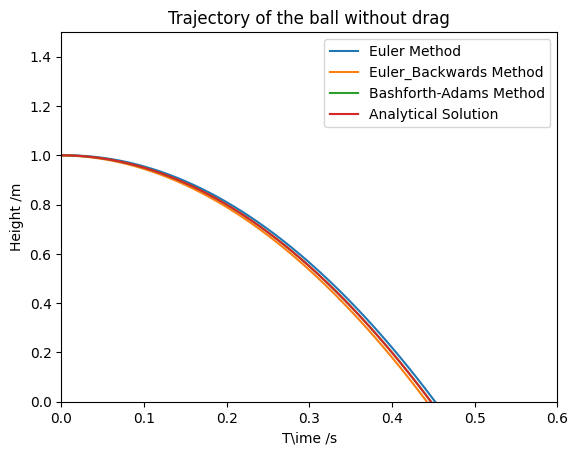

In [77]:
plt.plot(t,y_Euler, label="Euler Method")
plt.plot(t,y_Euler4, label="Euler_Backwards Method")
plt.plot(t,y_BA, label="Bashforth-Adams Method")
plt.plot(t,y_analytical, label="Analytical Solution")
plt.legend()
plt.title('Trajectory of the ball without drag')
plt.xlabel('T\ime /s')
plt.ylabel('Height /m')
plt.ylim(0,1.5)
plt.xlim(0,0.6)
plt.show()

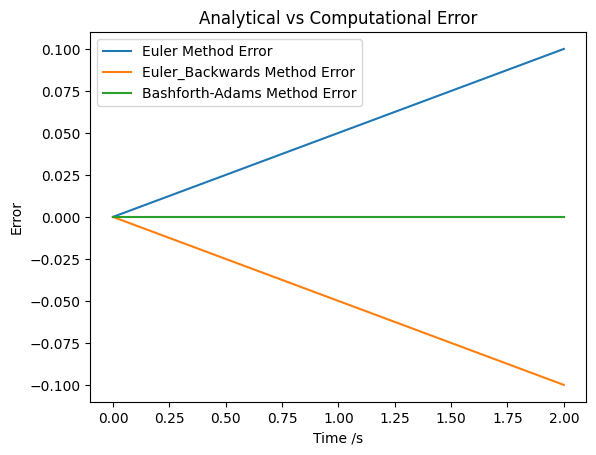

In [ ]:
#Plotting error

error_Euler = y_Euler-y_analytical
error_Euler4 = y_Euler4-y_analytical
error_BA = y_BA - y_analytical

plt.plot(t,error_Euler, label="Euler Method Error")
plt.plot(t,error_Euler4, label="Euler_Backwards Method Error")
plt.plot(t,error_BA, label="Bashforth-Adams Method Error") #looks like zero compared to Euler error, but true plot below
plt.title('Analytical vs Computational Error')
plt.legend()
plt.xlabel('Time /s')
plt.ylabel('Error')
plt.show()


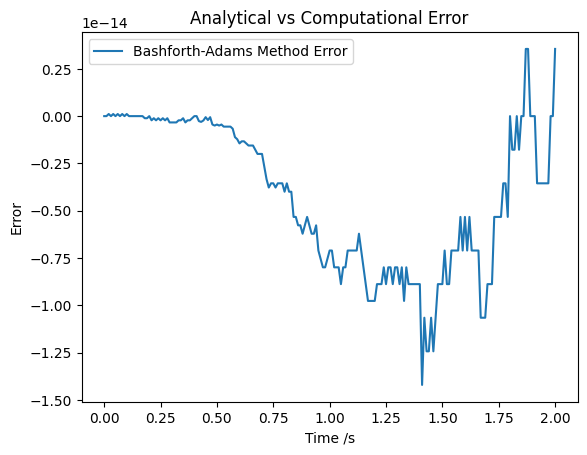

In [ ]:
#BA error plot 
plt.plot(t,error_BA, label="Bashforth-Adams Method Error")
plt.title('Analytical vs Computational Error')
plt.legend()
plt.xlabel('Time /s')
plt.ylabel('Error')
plt.show()

#averaging the forward and backwards is Bashforth????

In [ ]:
# adaptive step size 



Runge-Kutta Method

In [ ]:
y_RK[0] = y0
v_RK[0] = v0
y_RK[1] = y_analytical[1]
v_RK[1] = v_analytical[1]
for i in range(0,nsteps-1):
    k1 = v_RK[i]
    y_RK[i+1] = y_RK[i] + 1/6(k1 + k2 + k3 + k4) * h #h = adaptive step size


<>:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\danie\AppData\Local\Temp\ipykernel_35812\172678657.py:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  y_RK[i+1] = y_RK[i] + 1/6(k1 + k2 + k3 + k4) * h #h = adaptive step size
C:\Users\danie\AppData\Local\Temp\ipykernel_35812\172678657.py:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  y_RK[i+1] = y_RK[i] + 1/6(k1 + k2 + k3 + k4) * h #h = adaptive step size
C:\Users\danie\AppData\Local\Temp\ipykernel_35812\172678657.py:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  y_RK[i+1] = y_RK[i] + 1/6(k1 + k2 + k3 + k4) * h #h = adaptive step size


NameError: name 'k2' is not defined